In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute

## Q = HPHO = H (2 |000⟩ ⟨000| - I) H (I - 2|000⟩ ⟨000| - 2 |100⟩ ⟨100| - 2 |111⟩ ⟨111|)

'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
1st ITERATION OF GROVER'S OPERATOR


'applied O operator to all |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ3⟩'

<IPython.core.display.Latex object>

coherence of |ψ3⟩ =  5.250000000000002


'applied P operator to all |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.250000000000002


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  5.125000000000002
2nd ITERATION OF GROVER'S OPERATOR


'applied O operator to all |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  5.125000000000002


'applied Hadamard to all |ψ3⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  3.0000000000000027


'applied P operator to all |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  3.0000000000000027


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  5.125000000000007
3rd ITERATION OF GROVER'S OPERATOR


'applied O operator to all |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  5.125000000000007


'applied Hadamard to all |ψ3⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  4.640625000000006


'applied P operator to all |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  4.640625000000006


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  2.7812500000000067


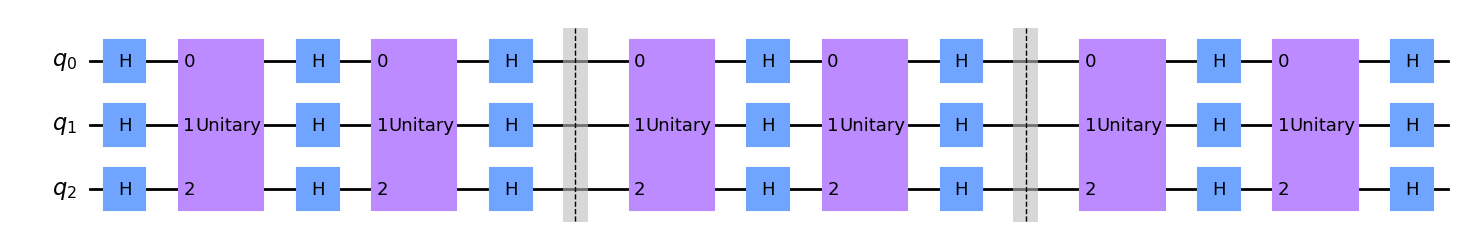

In [2]:
qc = QuantumCircuit(3)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
state = result.get_statevector()
display("initialised |ψ0⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ1⟩ = ",coherence)

#1st iteration
print("1st ITERATION OF GROVER'S OPERATOR")
O_operator = Operator([[-1, 0, 0, 0, 0, 0, 0, 0],  #000
                       [ 0, 1, 0, 0, 0, 0, 0, 0],  #001
                       [ 0, 0, 1, 0, 0, 0, 0, 0],  #010
                       [ 0, 0, 0, 1, 0, 0, 0, 0],  #011
                       [ 0, 0, 0, 0,-1, 0, 0, 0],  #100
                       [ 0, 0, 0, 0, 0, 1, 0, 0],  #101
                       [ 0, 0, 0, 0, 0, 0, 1, 0],  #110
                       [ 0, 0, 0, 0, 0, 0, 0,-1]]) #111

qc.append(O_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied O operator to all |ψ2⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ2⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ3⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ3⟩ = ",coherence)

P_operator = Operator([[ 1, 0, 0, 0, 0, 0, 0, 0],
                       [ 0,-1, 0, 0, 0, 0, 0, 0],
                       [ 0, 0,-1, 0, 0, 0, 0, 0],
                       [ 0, 0, 0,-1, 0, 0, 0, 0],
                       [ 0, 0, 0, 0,-1, 0, 0, 0],
                       [ 0, 0, 0, 0, 0,-1, 0, 0],
                       [ 0, 0, 0, 0, 0, 0,-1, 0],
                       [ 0, 0, 0, 0, 0, 0, 0,-1]])
qc.append(P_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied P operator to all |ψ4⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ4⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ5⟩ = ",coherence)

#2nd iteration
print("2nd ITERATION OF GROVER'S OPERATOR")
qc.barrier()
O_operator = Operator([[-1, 0, 0, 0, 0, 0, 0, 0],  #000
                       [ 0, 1, 0, 0, 0, 0, 0, 0],  #001
                       [ 0, 0, 1, 0, 0, 0, 0, 0],  #010
                       [ 0, 0, 0, 1, 0, 0, 0, 0],  #011
                       [ 0, 0, 0, 0,-1, 0, 0, 0],  #100
                       [ 0, 0, 0, 0, 0, 1, 0, 0],  #101
                       [ 0, 0, 0, 0, 0, 0, 1, 0],  #110
                       [ 0, 0, 0, 0, 0, 0, 0,-1]]) #110
qc.append(O_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied O operator to all |ψ2⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ3⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

P_operator = Operator([[ 1, 0, 0, 0, 0, 0, 0, 0],
                       [ 0,-1, 0, 0, 0, 0, 0, 0],
                       [ 0, 0,-1, 0, 0, 0, 0, 0],
                       [ 0, 0, 0,-1, 0, 0, 0, 0],
                       [ 0, 0, 0, 0,-1, 0, 0, 0],
                       [ 0, 0, 0, 0, 0,-1, 0, 0],
                       [ 0, 0, 0, 0, 0, 0,-1, 0],
                       [ 0, 0, 0, 0, 0, 0, 0,-1]])
qc.append(P_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied P operator to all |ψ4⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

#3rd iteration
print("3rd ITERATION OF GROVER'S OPERATOR")
qc.barrier()
O_operator = Operator([[-1, 0, 0, 0, 0, 0, 0, 0],  #000
                       [ 0, 1, 0, 0, 0, 0, 0, 0],  #001
                       [ 0, 0, 1, 0, 0, 0, 0, 0],  #010
                       [ 0, 0, 0, 1, 0, 0, 0, 0],  #011
                       [ 0, 0, 0, 0,-1, 0, 0, 0],  #100
                       [ 0, 0, 0, 0, 0, 1, 0, 0],  #101
                       [ 0, 0, 0, 0, 0, 0, 1, 0],  #110
                       [ 0, 0, 0, 0, 0, 0, 0,-1]]) #111
qc.append(O_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied O operator to all |ψ2⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ3⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

P_operator = Operator([[ 1, 0, 0, 0, 0, 0, 0, 0],
                       [ 0,-1, 0, 0, 0, 0, 0, 0],
                       [ 0, 0,-1, 0, 0, 0, 0, 0],
                       [ 0, 0, 0,-1, 0, 0, 0, 0],
                       [ 0, 0, 0, 0,-1, 0, 0, 0],
                       [ 0, 0, 0, 0, 0,-1, 0, 0],
                       [ 0, 0, 0, 0, 0, 0,-1, 0],
                       [ 0, 0, 0, 0, 0, 0, 0,-1]])
qc.append(P_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied P operator to all |ψ4⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)
'''
#4th iteration
print("4th ITERATION OF GROVER'S OPERATOR")
qc.barrier()
O_operator = Operator([[-1, 0, 0, 0, 0, 0, 0, 0],  #000
                       [ 0,-1, 0, 0, 0, 0, 0, 0],  #001
                       [ 0, 0,-1, 0, 0, 0, 0, 0],  #010
                       [ 0, 0, 0, 1, 0, 0, 0, 0],  #011
                       [ 0, 0, 0, 0, 1, 0, 0, 0],  #100
                       [ 0, 0, 0, 0, 0, 1, 0, 0],  #101
                       [ 0, 0, 0, 0, 0, 0, 1, 0],  #110
                       [ 0, 0, 0, 0, 0, 0, 0, 1]]) #111
qc.append(O_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied O operator to all |ψ2⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ3⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

P_operator = Operator([[ 1, 0, 0, 0, 0, 0, 0, 0],
                       [ 0,-1, 0, 0, 0, 0, 0, 0],
                       [ 0, 0,-1, 0, 0, 0, 0, 0],
                       [ 0, 0, 0,-1, 0, 0, 0, 0],
                       [ 0, 0, 0, 0,-1, 0, 0, 0],
                       [ 0, 0, 0, 0, 0,-1, 0, 0],
                       [ 0, 0, 0, 0, 0, 0,-1, 0],
                       [ 0, 0, 0, 0, 0, 0, 0,-1]])
qc.append(P_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied P operator to all |ψ4⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)
'''
qc.draw('mpl')

### G = DO = (2 |ψ1⟩ ⟨ψ1| - I) (I - 2 |000⟩⟨000| - 2 |100⟩⟨100| - 2 |111⟩⟨111|)

'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
1st GROVER ITERATION


'applied O operator to all |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied D operator to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  5.125000000000001
2nd GROVER ITERATION


'applied O operator to all |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  5.125000000000001


'applied D operator to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  5.125000000000002


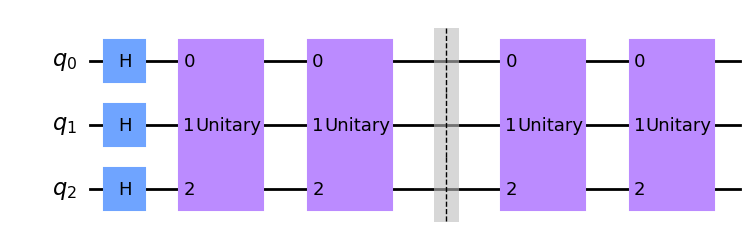

In [3]:
qc = QuantumCircuit(3)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
state = result.get_statevector()
display("initialised |ψ0⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ0⟩ = ",coherence)

qc.h([0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ1⟩ = ",coherence)

print("1st GROVER ITERATION")
O_operator = Operator([[-1, 0, 0, 0, 0, 0, 0, 0],
                       [ 0,-1, 0, 0, 0, 0, 0, 0],
                       [ 0, 0,-1, 0, 0, 0, 0, 0],
                       [ 0, 0, 0, 1, 0, 0, 0, 0],
                       [ 0, 0, 0, 0, 1, 0, 0, 0],
                       [ 0, 0, 0, 0, 0, 1, 0, 0],
                       [ 0, 0, 0, 0, 0, 0, 1, 0],
                       [ 0, 0, 0, 0, 0, 0, 0, 1]])
qc.append(O_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied O operator to all |ψ2⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ2⟩ = ",coherence)

D_operator = Operator([[-3/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4,-3/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4,-3/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4,-3/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4,-3/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4,-3/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4, 1/4,-3/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4,-3/4]])
qc.append(D_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied D operator to all |ψ5⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ5⟩ = ",coherence)

print("2nd GROVER ITERATION")
qc.barrier()
O_operator = Operator([[-1, 0, 0, 0, 0, 0, 0, 0],
                       [ 0,-1, 0, 0, 0, 0, 0, 0],
                       [ 0, 0,-1, 0, 0, 0, 0, 0],
                       [ 0, 0, 0, 1, 0, 0, 0, 0],
                       [ 0, 0, 0, 0, 1, 0, 0, 0],
                       [ 0, 0, 0, 0, 0, 1, 0, 0],
                       [ 0, 0, 0, 0, 0, 0, 1, 0],
                       [ 0, 0, 0, 0, 0, 0, 0, 1]])
qc.append(O_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied O operator to all |ψ2⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ2⟩ = ",coherence)

D_operator = Operator([[-3/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4,-3/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4,-3/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4,-3/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4,-3/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4,-3/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4, 1/4,-3/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4,-3/4]])
qc.append(D_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied D operator to all |ψ5⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ5⟩ = ",coherence)
'''
print("3rd GROVER ITERATION")
qc.barrier()
O_operator = Operator([[-1, 0, 0, 0, 0, 0, 0, 0],
                       [ 0,-1, 0, 0, 0, 0, 0, 0],
                       [ 0, 0,-1, 0, 0, 0, 0, 0],
                       [ 0, 0, 0, 1, 0, 0, 0, 0],
                       [ 0, 0, 0, 0, 1, 0, 0, 0],
                       [ 0, 0, 0, 0, 0, 1, 0, 0],
                       [ 0, 0, 0, 0, 0, 0, 1, 0],
                       [ 0, 0, 0, 0, 0, 0, 0, 1]])

qc.append(O_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied O operator to all |ψ2⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ2⟩ = ",coherence)

D_operator = Operator([[-3/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4,-3/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4,-3/4, 1/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4,-3/4, 1/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4,-3/4, 1/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4,-3/4, 1/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4, 1/4,-3/4, 1/4],
                       [ 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4,-3/4]])
qc.append(D_operator,[0,1,2])
result = execute(qc, backend).result()
state = result.get_statevector()
display("applied D operator to all |ψ5⟩", state.draw('latex'))
density_operator = state.to_operator()
#print(density_operator.data)
coherence = 0
for i in range(8):
    for j in range(8):
        if(i != j):
            coherence += abs(density_operator.data[i,j])
print("coherence of |ψ5⟩ = ",coherence)
'''
qc.draw('mpl')